# 11-08-2022 - Naive Bayes Classifiers

### naive bayes classifier
### Types: GaussianNB - any continuous data, BernoulliNB - binary data, MultinomialNB - count data (each feature )

## Decision Trees

In [1]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
import graphviz

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 42)
tree = DecisionTreeClassifier().fit(X_train, y_train)
print(f"Training score {tree.score(X_train,y_train)}")
print(f"Test score: {tree.score(X_test, y_test)}")

Training score 1.0
Test score: 0.9370629370629371


In [4]:
#we have accuracy 1.0 in traing score - 
#it might mean that we are overfitting the data
#we need to restrict the depth of the tree model 
tree4 = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
print(f"Training score {tree4.score(X_train,y_train)}")
print(f"Test score: {tree4.score(X_test, y_test)}")

Training score 0.9953051643192489
Test score: 0.958041958041958


In [5]:
#Let us visualize the tree
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ["malignant", "benign"],
               feature_names= cancer.feature_names, impurity = False, filled=True)

In [6]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Uzytkownik/anaconda3/Library/bin/graphviz'

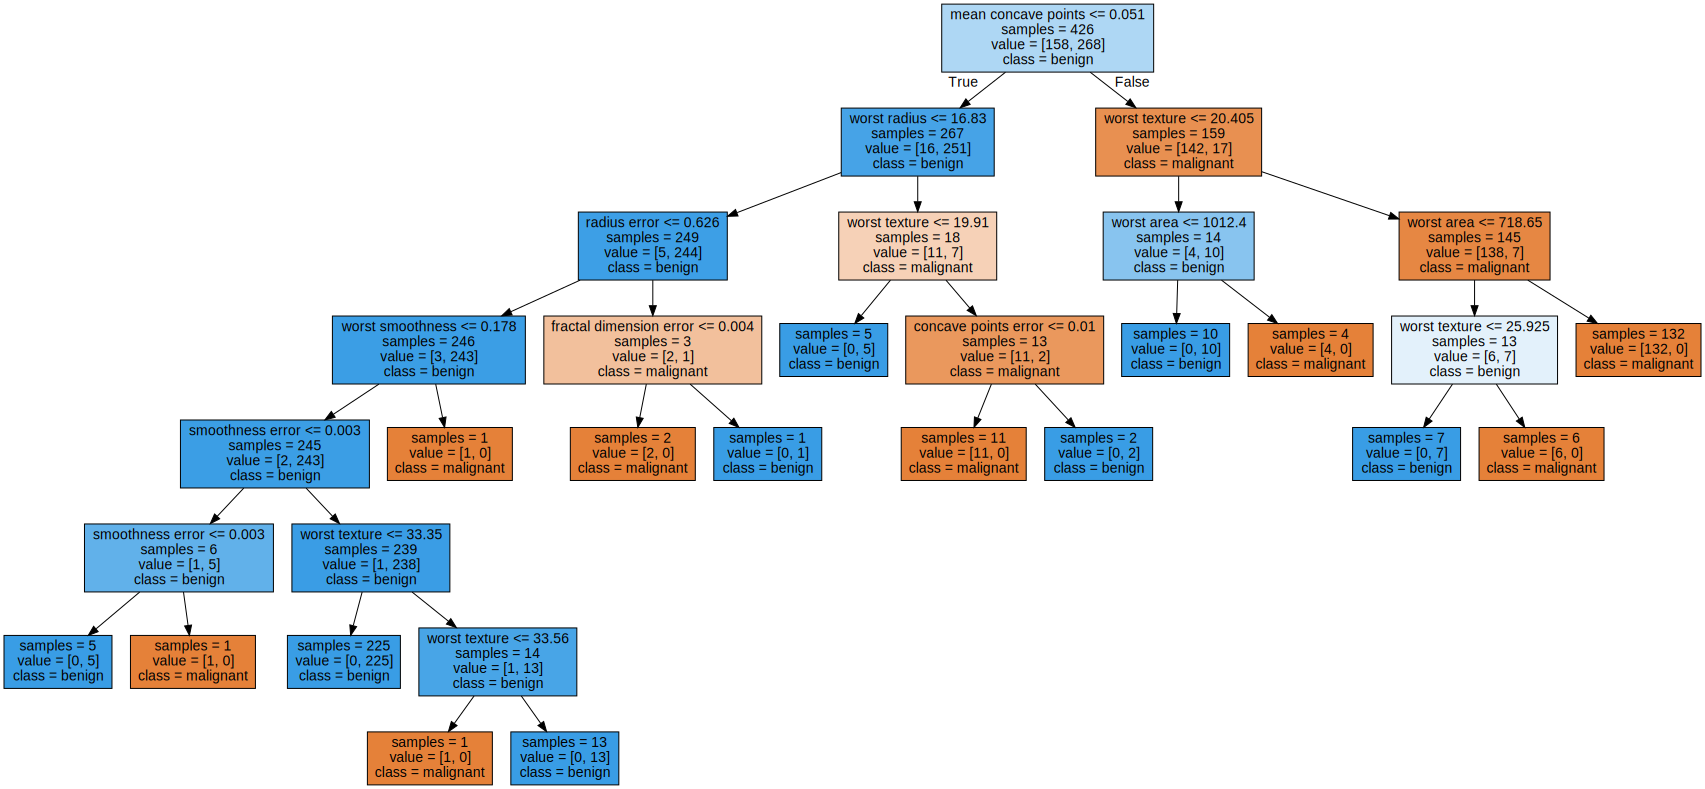

In [7]:
import graphviz
with open("tree.dot") as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

Feature importances: [0. 1.]


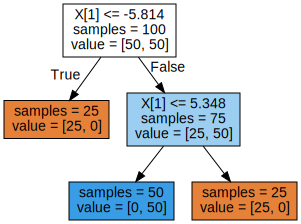

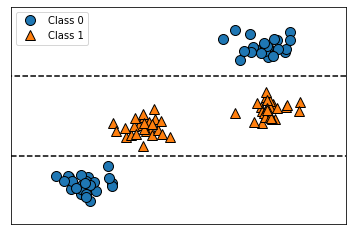

In [8]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

## Random forests - a collection of decision trees

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [10]:
X,y = make_moons(n_samples= 100, noise = 0.25, random_state= 3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, 
                                                    random_state=42)

In [11]:
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

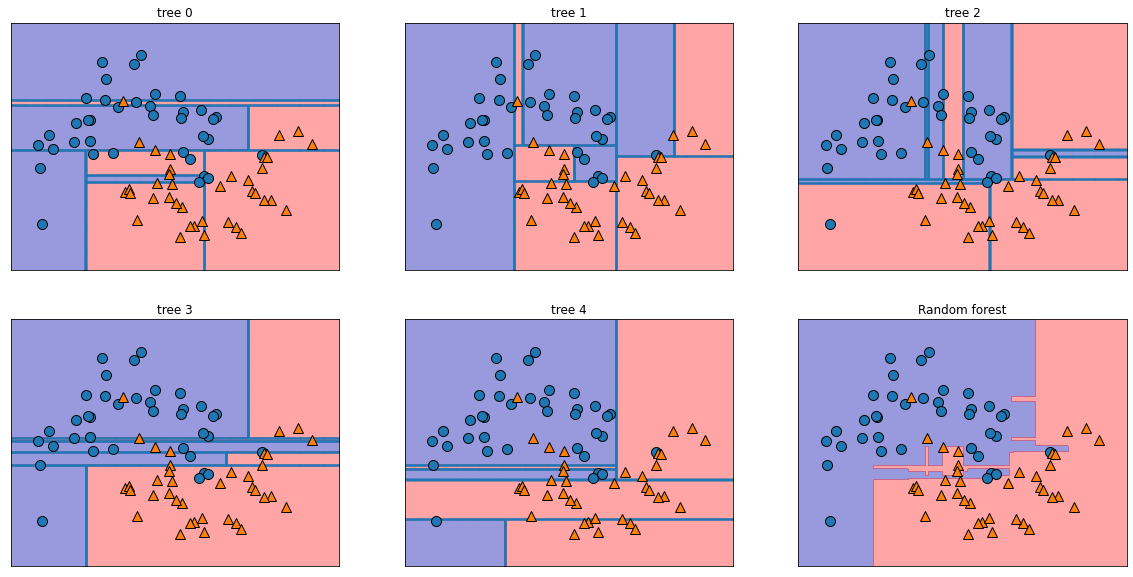

In [12]:
#let us visualize the decision tree boundaries learned by each tree
fig, axes = plt.subplots(2,3, figsize = (20,10))


for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill =True, ax= axes[-1,-1],
                               alpha = .4)
axes[-1,-1].set_title("Random forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

In [13]:
#Let us use 100 decision trees in random forest model 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 42)
forestC = RandomForestClassifier(n_estimators= 100, random_state=1).fit(X_train, y_train)
print(f"Test score: {forestC.score(X_test, y_test)}")
print(f"Training score: {forestC.score(X_train, y_train)}")

Test score: 0.965034965034965
Training score: 1.0


Text(0, 0.5, 'Feature importance ')

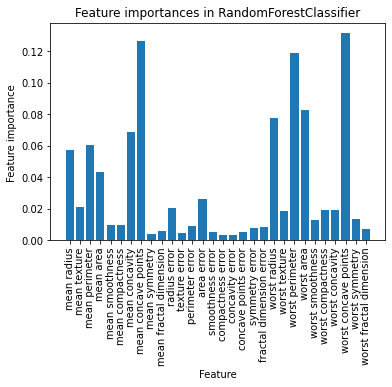

In [14]:

#let us plot feature importances
cancer.feature_names
forestC.feature_importances_
plt.xticks(rotation = 90)
plt.bar(x = cancer.feature_names, height = forestC.feature_importances_)
plt.title("Feature importances in RandomForestClassifier")
plt.xlabel("Feature") 
plt.ylabel("Feature importance ")

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 0)
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print(f"Training score: {gbrt.score(X_train,y_train)}")
print(f"Test score: {gbrt.score(X_test,y_test)}")

Training score: 1.0
Test score: 0.965034965034965


In [17]:
#We can see that we got 100% accuracy on training data, which implies that 
#the model is overfitting the data 
#We can reduce it by:
# - limiting the max depth 
# or - lower the learning rate
gbrt1 = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
print(f"Training score: {gbrt1.score(X_train,y_train)}")
print(f"Test score: {gbrt1.score(X_test,y_test)}")

Training score: 0.9906103286384976
Test score: 0.972027972027972


In [18]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate= 0.01).fit(X_train, y_train)
print(f"Training score: {gbrt2.score(X_train,y_train)}")
print(f"Test score: {gbrt2.score(X_test,y_test)}")

Training score: 0.9882629107981221
Test score: 0.965034965034965


Text(0, 0.5, 'Feature importance ')

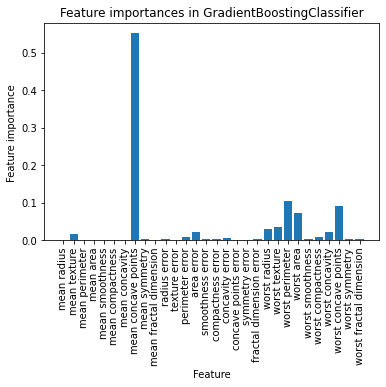

In [19]:
#let us plot feature importances for this GradientBosstingClassifier
plt.xticks(rotation = 90)
plt.bar(x = cancer.feature_names, height = gbrt.feature_importances_)
plt.title("Feature importances in GradientBoostingClassifier")
plt.xlabel("Feature") 
plt.ylabel("Feature importance ")

Text(0, 0.5, 'Feature importance ')

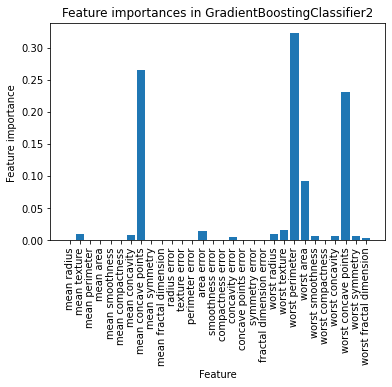

In [20]:
plt.xticks(rotation = 90)
plt.bar(x = cancer.feature_names, height = gbrt1.feature_importances_)
plt.title("Feature importances in GradientBoostingClassifier2")
plt.xlabel("Feature") 
plt.ylabel("Feature importance ")

# Kernelized Support Vector Machines

In [22]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers = 4, random_state = 8)
y = y % 2

Text(0, 0.5, 'Feature 1')

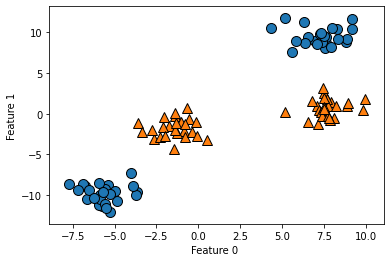

In [23]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0 ")
plt.ylabel("Feature 1")

c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

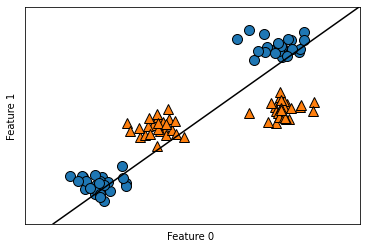

In [24]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(linear_svm, X)
plt.xlabel("Feature 0 ")
plt.ylabel("Feature 1")

In [25]:
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d

C:\Users\Uzytkownik\AppData\Local\Temp\ipykernel_14632\374372005.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

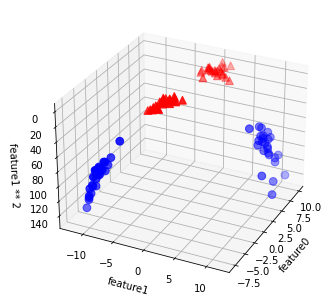

In [26]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [28]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef,intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\Uzytkownik\AppData\Local\Temp\ipykernel_14632\3441328834.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev = -152, azim = -26)


Text(0.5, 0, 'feature0 ** 2')

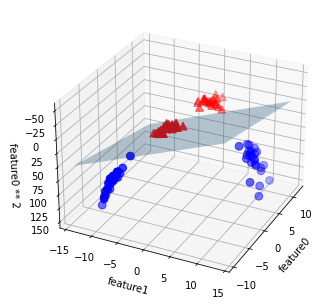

In [29]:
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:,0].min() -2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() -2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1] *YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c= 'b',
          cmap = mglearn.cm2, s= 60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

Text(0, 0.5, 'Feature 1')

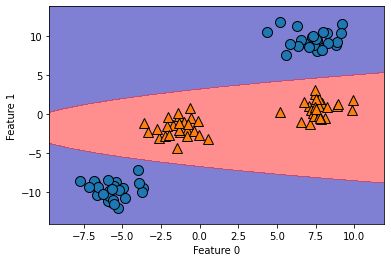

In [30]:
#Decision boundary found by a linear SVM, 
#on the expanded 3-dimensional dataset
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [31]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X,y)

Text(0, 0.5, 'Feature 1')

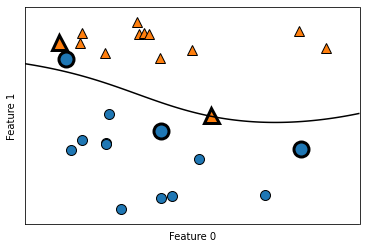

In [32]:
mglearn.plots.plot_2d_separator(svm, X, eps = .5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [33]:
#decision boundary and support vectors by SVM model with RBF kernel

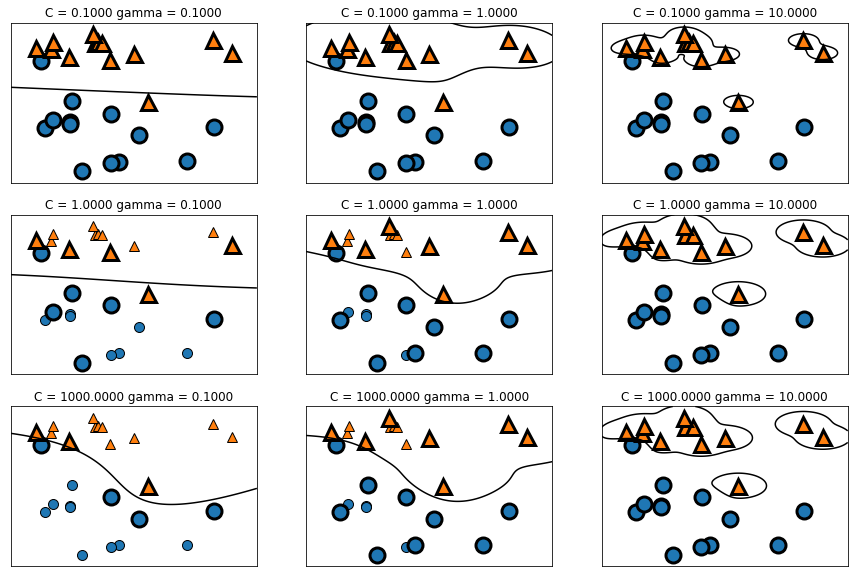

In [34]:
fig, axes = plt.subplots(3,3, figsize = (15,10))
for C, ax in zip([-1,0,3], [0,1,2]):
    for Gamma, ax2 in zip(range(-1,2), [0,1,2]):
        mglearn.plots.plot_svm(log_C = C, log_gamma= Gamma, ax = axes[ax,ax2])
#decision boundaries and support vectors for different values of C and gamma

In [35]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 42)
svc = SVC().fit(X_train, y_train)
print(f"Training score {svc.score(X_train, y_train)}")
print(f"Test score: {svc.score(X_test, y_test)}")

Training score 0.9107981220657277
Test score: 0.951048951048951


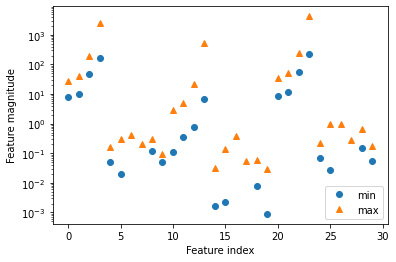

In [36]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [37]:
#As it is seen above, the magnitude of the features varies a lot
#It has negative impact on the effectiveness of SVM model.
# It can be done by preprocessing and rescaling the data such that
#all features are between 0 and 1 

In [38]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis = 0)
# compute the range of each feature (max - min) on the training set 
range_on_training = (X_train - min_on_training).max(axis = 0)
#substract the min, and divide by range
#afterward, min = 0 and max = 1 for each feature 
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))


Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [39]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [40]:
svc = SVC().fit(X_train_scaled, y_train)
print(f"Training score: {svc.score(X_train_scaled,y_train)}")
print(f"Test scoer: {svc.score(X_test_scaled, y_test)}")

Training score: 0.9835680751173709
Test scoer: 0.9790209790209791


In [41]:
#scaling the data greatly improved the performance

In [42]:
#we can still change the parameters of C or gamma 
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print(f"Training score: {svc.score(X_train_scaled,y_train)}")
print(f"Test scoer: {svc.score(X_test_scaled, y_test)}")

Training score: 1.0
Test scoer: 0.951048951048951


In [43]:
svc = SVC(gamma = 0.5)
svc.fit(X_train_scaled, y_train)
print(f"Training score: {svc.score(X_train_scaled,y_train)}")
print(f"Test scoer: {svc.score(X_test_scaled, y_test)}")


Training score: 0.9812206572769953
Test scoer: 0.9790209790209791
